## Get Data

In [1]:
from get_data import *

In [3]:
heads,desc = import_from_mongo()

## Build Vocab

In [6]:
FN = 'vocabulary-embedding'
seed = 42
vocab_size = 40000
embedding_dim = 100
lower = False

In [7]:
if lower:
    heads = [h.lower() for h in heads]
    desc = [h.lower() for h in desc]

In [8]:
from collections import Counter
from itertools import chain

def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = map(lambda x: x[0], sorted(vocabcount.items(), key = lambda x: -x[1]))
    return list(vocab),vocabcount

In [9]:
vocab,vocabcount = get_vocab(heads+desc)

In [10]:
print(vocab[:50])

print(len(vocab))

['the', 'and', 'to', 'of', 'a', 'that', 'I', 'in', 'you', 'is', 'we', 'it', 'this', 'was', 'for', 'are', 'have', 'so', 'with', 'on', 'they', 'what', 'my', 'be', 'can', 'And', 'but', 'about', 'as', 'not', 'at', 'all', 'do', 'like', "it's", 'our', 'from', 'or', 'one', 'people', 'an', 'just', 'if', 'when', 'your', 'me', 'because', 'these', 'by', 'how']
203554


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

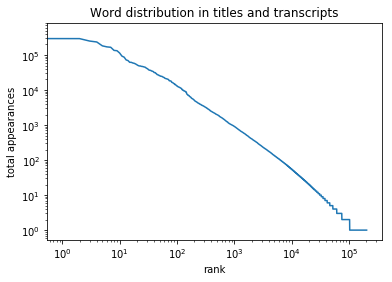

In [12]:
plt.plot([vocabcount[w] for w in vocab])
plt.gca().set_xscale('log',nonposx='clip')
plt.gca().set_yscale('log',nonposy='clip')
plt.title('Word distribution in titles and transcripts')
plt.xlabel('rank')
plt.ylabel('total appearances')
plt.show()

## Index Words

In [14]:
empty = 0
eos = 1
start_idx = eos + 1

In [15]:
def get_idx(vocab,vocabcount):
    word2idx = dict((word, idx+start_idx) for idx,word in enumerate(vocab))
    word2idx['<empty>'] = empty
    word2idx['<eos>'] = eos
    
    idx2word = dict((idx,word) for word, idx in word2idx.items())
    
    return word2idx, idx2word

In [16]:
word2idx, idx2word = get_idx(vocab,vocabcount)

## Word Embedding with GloVe